In [1]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 50 s


In [271]:
df = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_comb\\BES2019_W23_Panel_v23.0.dta" )

MemoryError: Unable to allocate 7.87 GiB for an array with shape (9802, 107796) and data type float64

In [276]:
gender = pd.read_stata( "E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W23_comb\\BES2019_W23_Panel_v23.0.dta",columns=['gender'] )

In [274]:
gc.collect()

20

In [3]:
search(df,"gender|alscale")

genderRolesW10     30237
impGenderW14        7801
gender            106229
dtype: int64

In [4]:
search(df,"nuclear|nuke")

nuclearGridW4     7927
keepNukesW4       7927
nuclearGridW7    30895
keepNukesW7      30895
keepNukesW12     34394
keepNukesW23     30949
dtype: int64

In [39]:
search(df,"gender|al_scale|al\dW23|gayEquality")

genderRolesW10        30237
impGenderW14           7801
gayEqualityW15         5109
gayEqualityW16        37959
gayEqualityW17        34366
al1W23                30949
al2W23                30949
al3W23                30949
al4W23                30949
al5W23                30949
gayEqualityW23        30949
gayEqualityW1_W5      41876
gayEqualityW6_W14     63222
al_scaleW1_W5         37890
al_scaleW6            27288
al_scaleW7_W9         35873
al_scaleW10_W12       30088
al_scaleW13           27252
al_scaleW14W15        31629
al_scaleW16           32671
al_scaleW17_W19       29773
al_scaleW20           26914
al_scaleW21           25692
al_scaleW22           23617
al_scaleW23           26399
gender               106229
dtype: int64

In [30]:
df["al_scaleW23"].groupby(df["gender"]).apply(lambda x: x.cat.codes.replace(-1,np.nan).mean()/20)

gender
Male      0.609325
Female    0.619419
Name: al_scaleW23, dtype: float64

In [10]:
df["al_scaleW23"]

0         NaN
1         4.0
2         6.5
3         NaN
4         NaN
         ... 
107791    NaN
107792    NaN
107793    NaN
107794    NaN
107795    NaN
Name: al_scaleW23, Length: 107796, dtype: category
Categories (21, object): ['Libertarian' < 0.5 < 1.0 < 1.5 ... 8.5 < 9.0 < 9.5 < 'Authoritarian']

In [34]:
df[["al1W23","al2W23","al3W23","al5W23"]].apply(lambda x: x.cat.codes.replace(-1,np.nan)/5).mean(axis=1).groupby(df["gender"]).mean()

gender
Male      0.532445
Female    0.529771
dtype: float64

In [37]:
authoritarianism = df["al_scaleW23"].cat.codes.replace(-1,np.nan)/20

In [55]:
gayEquality = df["gayEqualityW23"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
blackEquality = df["blackEqualityW23"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
femaleEquality = df["femaleEqualityW23"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

In [179]:
het_or_not = df["p_sexualityW23"]=="Heterosexual"
het_or_not[df["p_sexualityW23"].isnull()]=np.nan
het_or_not = het_or_not.replace({1.0:"Heterosexual",0:"Not Heterosexual"})
het_or_not.value_counts(dropna=False)

NaN                 76903
Heterosexual        27207
Not Heterosexual     3686
Name: p_sexualityW23, dtype: int64

In [183]:
whiteBrit_or_not = df["p_ethnicityW23"]=="White British"
whiteBrit_or_not[df["p_ethnicityW23"].isnull()]=np.nan
whiteBrit_or_not = whiteBrit_or_not.replace({1.0:"White British",0.0:"Not White British"})
whiteBrit_or_not.value_counts(dropna=False)

NaN                  78397
White British        26243
Not White British     3156
Name: p_ethnicityW23, dtype: int64

In [186]:
authoritarianism.name = 'authoritarianism'
gayEquality.name = 'gayEquality'
blackEquality.name = 'blackEquality'
femaleEquality.name = 'femaleEquality'
het_or_not.name = 'het_or_not'
whiteBrit_or_not.name = 'whiteBrit_or_not'

In [139]:
g.axes[0,0].set_xlabel('axes label 1')
g.axes[0,1].set_xlabel('axes label 2')

authoritarianism     float64
gender              category
variable              object
value                float64
dtype: object

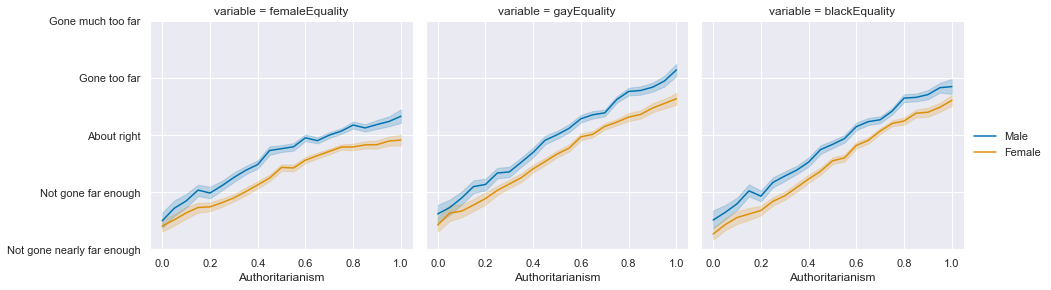

In [184]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","gender"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="gender");
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

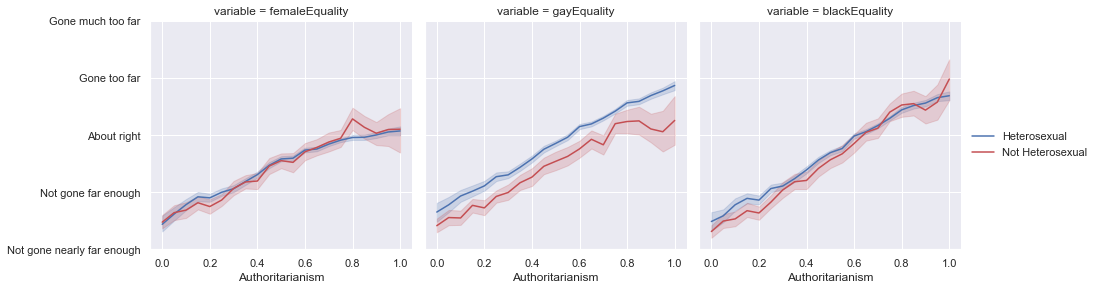

In [188]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not],axis=1)
data = data.melt(id_vars=["authoritarianism","het_or_not"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="het_or_not",palette={'Not Heterosexual':'r','Heterosexual':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

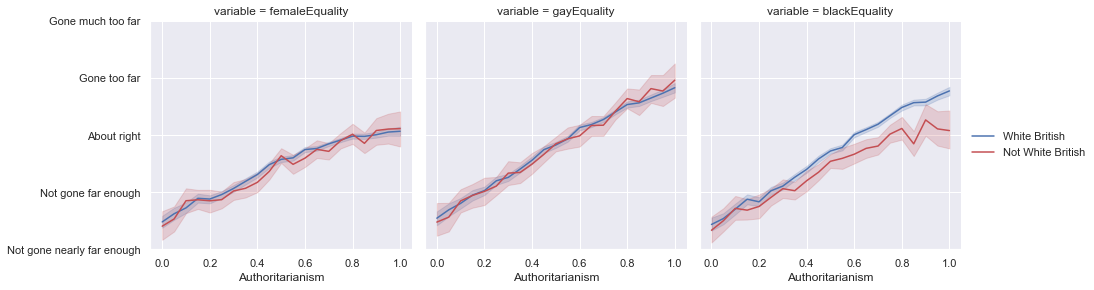

In [190]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,whiteBrit_or_not],axis=1)
data = data.melt(id_vars=["authoritarianism","whiteBrit_or_not"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="whiteBrit_or_not",palette={'Not White British':'r','White British':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

In [ ]:
# what if we mask these last two on gender as well?

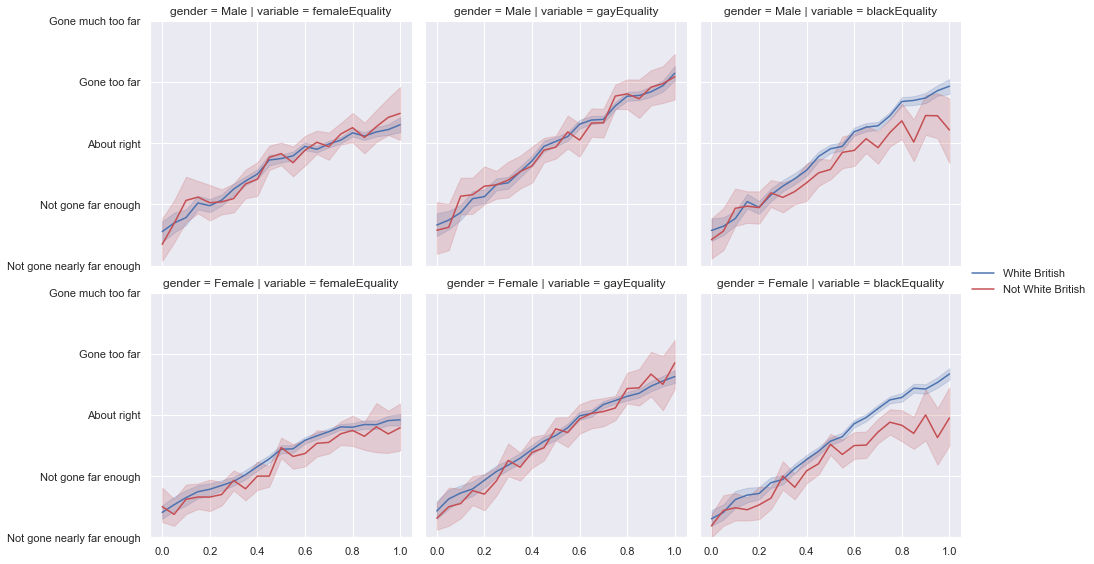

In [191]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,whiteBrit_or_not,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","whiteBrit_or_not","gender"])

g = sns.FacetGrid(data=data, col="variable",row="gender",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="whiteBrit_or_not",palette={'Not White British':'r','White British':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

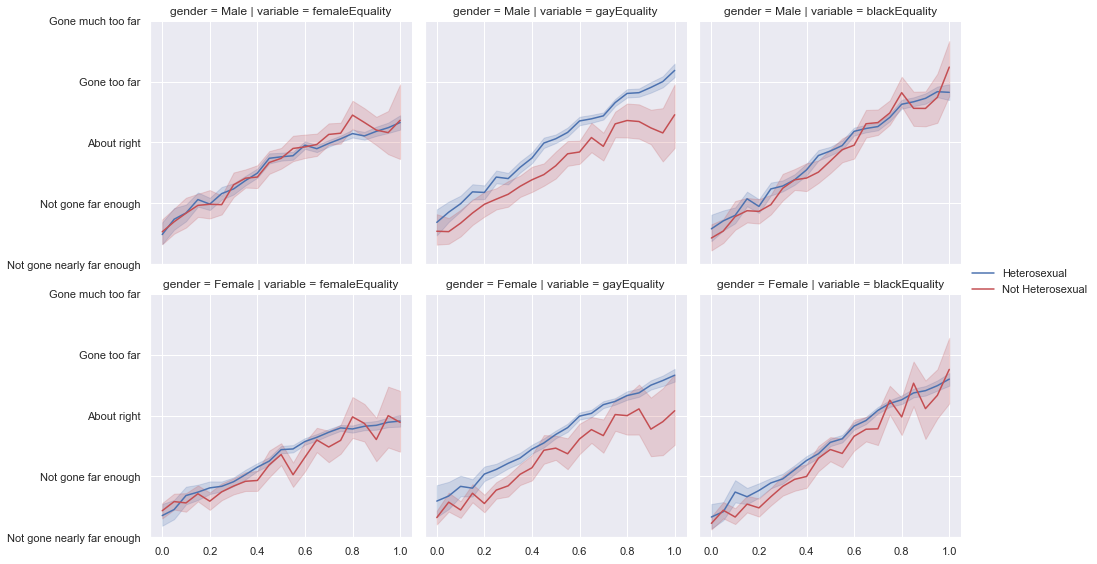

In [192]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","het_or_not","gender"])

g = sns.FacetGrid(data=data, col="variable",row='gender',height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="het_or_not",palette={'Not Heterosexual':'r','Heterosexual':'b'});
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

In [216]:
authoritarianism_minus_cen = df[["al1W23","al2W23","al3W23","al5W23",]].apply(lambda x: x.cat.codes.replace(-1,np.nan)/5).mean(axis=1).round(2)
authoritarianism_minus_cen.name = 'authoritarianism_minus_cen'

In [204]:
authoritarianism.notnull().sum(),authoritarianism_minus_cen.notnull().sum(),

(26399, 30949)

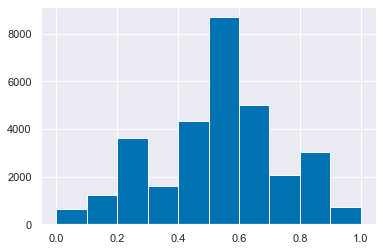

In [217]:
authoritarianism_minus_cen.hist(bins=10)

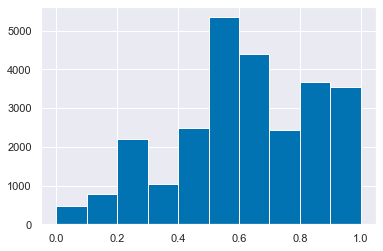

In [218]:
authoritarianism.hist(bins=10)

In [221]:
authoritarianism.value_counts()

0.75    2434
0.70    2285
0.65    2123
0.80    1920
0.60    1878
0.50    1781
0.85    1745
0.55    1689
0.90    1458
0.45    1326
0.40    1163
0.95    1128
0.35    1029
1.00     971
0.30     908
0.25     719
0.20     586
0.15     447
0.10     343
0.00     237
0.05     229
Name: authoritarianism, dtype: int64

In [219]:
authoritarianism_minus_cen.value_counts()

0.60    3417
0.80    2832
0.55    2711
0.70    2585
0.50    2557
0.65    2431
0.40    2236
0.45    2109
0.75    2073
0.35    1588
0.30    1460
0.25    1190
0.20     973
0.15     732
1.00     616
0.10     493
0.05     319
0.00     304
0.85     200
0.90      94
0.95      29
Name: authoritarianism_minus_cen, dtype: int64

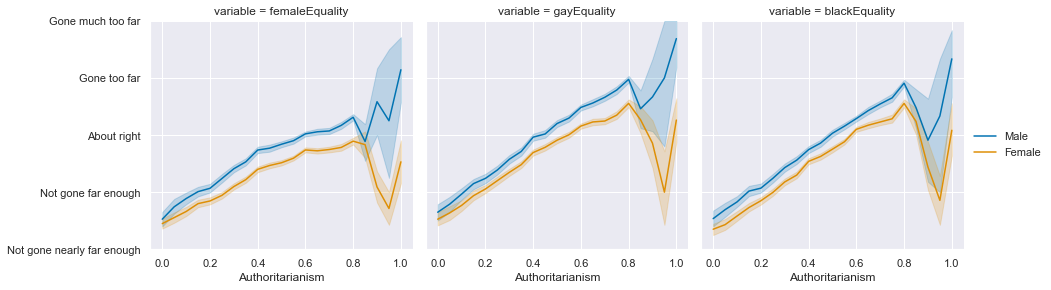

In [220]:
data =pd.concat([authoritarianism_minus_cen,femaleEquality,gayEquality,blackEquality,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism_minus_cen","gender"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism_minus_cen",y="value",hue="gender");
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

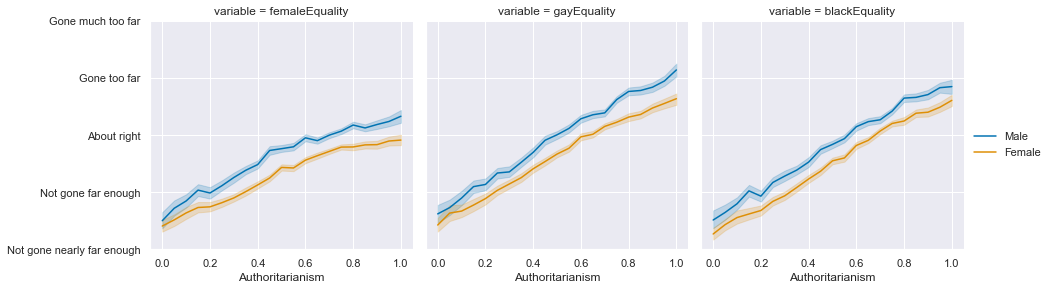

In [222]:
data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,df["gender"]],axis=1)
data = data.melt(id_vars=["authoritarianism","gender"])

g = sns.FacetGrid(data=data, col="variable",height=4)
g.map_dataframe(sns.lineplot,x="authoritarianism",y="value",hue="gender");
plt.ylim([0,4]);
g.add_legend();
g.axes[0,0].set_xlabel('Authoritarianism');
g.axes[0,1].set_xlabel('Authoritarianism');
g.axes[0,2].set_xlabel('Authoritarianism');
g.set(yticks=[0,1,2,3,4])
g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
                       'About right','Gone too far',
                       'Gone much too far']);

In [ ]:
## where to go from here
# Beg Rosalind Shorrocks for halp!

# try to find gender gaps on other variables that correlate with authoritarianism???

In [223]:
df

id  waves_taken  wave1  wave2  wave3  wave4  wave5  wave6  wave7  \
0       1.0          9.0    1.0    1.0    0.0    1.0    1.0    1.0    1.0   
1       2.0         20.0    1.0    0.0    1.0    1.0    1.0    1.0    1.0   
2       3.0         16.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0   
3       4.0          2.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   
4       5.0          2.0    1.0    1.0    0.0    0.0    0.0    0.0    0.0   
...     ...          ...    ...    ...    ...    ...    ...    ...    ...   
107791  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107792  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107793  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107794  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
107795  NaN          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

        wave8  ...  p_edlevelUniW19  p_edlevelUniW20  p_edlevelUniW21  \
0         1.0  ...              NaN              NaN              NaN   
1         1.0  ...    Undergraduate    Undergraduate    Undergraduate   
2         0.0  ...          A-level              NaN              NaN   
3         0.0  ...              NaN              NaN              NaN   
4         0.0  ...              NaN              NaN              NaN   
...       ...  ...              ...              ...              ...   
107791    NaN  ...              NaN              NaN              NaN   
107792    NaN  ...              NaN              NaN              NaN   
107793    NaN  ...              NaN              NaN              NaN   
107794    NaN  ...              NaN              NaN              NaN   
107795    NaN  ...              NaN              NaN              NaN   

        p_edlevelUniW8  p_edlevelUniW17  p_edlevelUniW18  p_eurefturnout  \
0        Undergraduate              NaN              NaN      Yes, voted   
1        Undergraduate    Undergraduate    Undergraduate      Yes, voted   
2                  NaN              NaN              NaN      Yes, voted   
3                  NaN              NaN              NaN             NaN   
4                  NaN              NaN              NaN             NaN   
...                ...              ...              ...             ...   
107791             NaN              NaN              NaN             NaN   
107792             NaN              NaN              NaN             NaN   
107793             NaN              NaN              NaN             NaN   
107794             NaN              NaN              NaN             NaN   
107795             NaN              NaN              NaN             NaN   

        cogempathyIRTW14  affempathyIRTW14  zeroSumIRTW14  
0                    NaN               NaN            NaN  
1                    NaN               NaN            NaN  
2                    NaN               NaN            NaN  
3                    NaN               NaN            NaN  
4                    NaN               NaN            NaN  
...                  ...               ...            ...  
107791               NaN               NaN            NaN  
107792               NaN               NaN            NaN  
107793               NaN               NaN            NaN  
107794               NaN               NaN            NaN  
107795               NaN               NaN            NaN  

[107796 rows x 9830 columns]

In [2]:
%%time
dataset_name = "W20_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline
%run BES_header.py {dataset_name} {df_list}

Toggle code

Wall time: 537 ms


In [38]:
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (463, 14)


In [5]:
# authoritarianism.corr(gayEquality)

In [6]:
BES_reduced_with_na.astype('float')[BES_reduced_with_na["gender_Female"]].mean()-BES_reduced_with_na.astype('float')[~BES_reduced_with_na["gender_Female"]].mean()

turnoutUKGeneral__Very likely that I will vote   -0.092214
partyIdStrength__Not very strong                  0.071216
polAttention__Pay a great deal of attention      -0.843130
pidWeThey__Strongly agree                        -0.158527
pidInterestedOthers__Strongly agree              -0.006465
                                                    ...   
responsibleEconC_2_Yes                           -0.004656
responsibleEconC_1_Yes                           -0.065377
coronaMeasures_2_Yes                              0.044327
coronaMeasures_1_Yes                             -0.002246
coronaMeasures_4_Yes                              0.018628
Length: 742, dtype: float64

In [10]:
#gayEquality[gender]
# gayEquality.groupby(gender["gender"]).mean()
# gap = -.33

In [8]:
search(BES_reduced_with_na,"al_scale")

al_scale__Authoritarian    26914
dtype: int64

In [9]:
search(BES_reduced_with_na,"gender")

gender_Female    31468
dtype: int64

In [11]:
corrs = BES_reduced_with_na.astype('float').corrwith(BES_reduced_with_na["al_scale__Authoritarian"])

In [12]:
corrs.sort_values().head(10)

asylumMore__Many more                   -0.642608
immigSelf__Allow many more              -0.595072
immigCultural__Enriches cultural life   -0.550090
immigEcon__Good for economy             -0.525165
familiesMore__Many more                 -0.509567
globalMigration__Mainly good            -0.486567
euMore__Many more                       -0.464038
noneuMore__Many more                    -0.444615
studentsMore__Many more                 -0.440946
ptvGrn__Very likely                     -0.430384
dtype: float64

In [13]:
corrs.sort_values().tail(10)

dealPriorityRedTape__Extremely important    0.582385
al4__Strongly agree                         0.628310
immigrantsWelfareState__Strongly agree      0.634510
govtHandouts__Strongly agree                0.635757
dealPriorityImmig__Extremely important      0.640230
al3__Strongly agree                         0.783903
al2__Strongly agree                         0.790263
al5__Strongly agree                         0.800879
al1__Strongly agree                         0.819360
al_scale__Authoritarian                     1.000000
dtype: float64

In [18]:
gender_gap = BES_reduced_with_na.astype('float')[BES_reduced_with_na["gender_Female"]].mean()-BES_reduced_with_na.astype('float')[~BES_reduced_with_na["gender_Female"]].mean()
gender_gap = gender_gap/BES_reduced_with_na.astype('float').max()

In [19]:
gender_gap.sort_values().head(10)

selfOccSuperviseLast_Yes                                                                                                                 -0.181702
p_job_sector_Private sector profit-seeking (e.g. public limited company, partnership)                                                    -0.179007
sectorPartner_Other public sector employer *Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch   -0.149172
sector_Private sector firm of company Including, for example, limited companies and PLCs                                                 -0.147856
p_work_stat_Working full time (30 or more hours per week)                                                                                -0.128895
workingStatus_Working full time (30 or more hours per week)                                                                              -0.123512
selfPriorities_brexit_Yes                                                                                             

In [23]:
high_correlation_corrs = [x for x in list( corrs[corrs.abs()>.25].index ) if x not in ["al_scale__Authoritarian",
                                                                                      "al1__Strongly agree",
                                                                                      "al2__Strongly agree",
                                                                                      "al3__Strongly agree",
                                                                                      "al4__Strongly agree",
                                                                                      "al5__Strongly agree"] ]

In [20]:
gender_gap.loc[ corrs.sort_values().head(10).index ]

asylumMore__Many more                    0.051097
immigSelf__Allow many more               0.013284
immigCultural__Enriches cultural life    0.064141
immigEcon__Good for economy              0.010820
familiesMore__Many more                  0.040651
globalMigration__Mainly good             0.026627
euMore__Many more                        0.033188
noneuMore__Many more                     0.038408
studentsMore__Many more                  0.008390
ptvGrn__Very likely                      0.058955
dtype: float64

In [24]:
gender_gap.loc[high_correlation_corrs].abs().mean()

0.028762200800453698

In [25]:
gender_gap.abs().mean()

0.026679764331555847

In [26]:
gender_gap.loc[high_correlation_corrs]

likeJohnson__Strongly like                -0.000338
likeStarmer__Strongly like                 0.027477
likeDavey__Strongly like                   0.039078
likeSturgeon__Strongly like                0.108023
likeFarage__Strongly like                 -0.067960
                                             ...   
conPriorities_nhs_Yes                     -0.007779
scotReferendumIntention_Will vote 'Yes'    0.044579
euRefVoteAfter_Stay out of the EU         -0.065716
euID_The leave side                       -0.061127
responsibleEconC_1_Yes                    -0.065377
Length: 107, dtype: float64

In [27]:
gender_gap.loc[ corrs.sort_values().tail(10).index ]

dealPriorityRedTape__Extremely important   -0.001480
al4__Strongly agree                         0.118298
immigrantsWelfareState__Strongly agree     -0.015659
govtHandouts__Strongly agree               -0.003571
dealPriorityImmig__Extremely important      0.012632
al3__Strongly agree                        -0.020997
al2__Strongly agree                        -0.062095
al5__Strongly agree                        -0.005397
al1__Strongly agree                        -0.035736
al_scale__Authoritarian                    -0.002196
dtype: float64

In [28]:
# search(BES_reduced_with_na,"equality")

In [29]:
useful_index = [x for x in gender_gap.index if x not in  ["gender_Female", "al_scale__Authoritarian",
                                                                                      "al1__Strongly agree",
                                                                                      "al2__Strongly agree",
                                                                                      "al3__Strongly agree",
                                                                                      "al4__Strongly agree",
                                                                                      "al5__Strongly agree",
                                                          'age','resourceAccess1_2_Yes', 'resourceAccess3_5_Yes', 'edlevelPartner__Postgrad',
                                                          'anyUni__Yes, I graduated from higher education', 'p_edlevelUni__Postgrad', 'p_edlevel__Postgrad', 'p_education_age__Still at school/Full time student',
                                                         
                                                         
                                                         ]]


# age, resourceAccess1_2_Yes, resourceAccess3_5_Yes, edlevelPartner__Postgrad, 

# avoid things which might historical demographic 'overhangs'

# however, the education variables are prob more recent - 
# bears separate investigation!

# anyUni__Yes, I graduated from higher education
#  'p_edlevelUni__Postgrad',
#  'p_edlevel__Postgrad',
#  'p_education_age__Still at school/Full time student',

In [30]:
gender_gap[useful_index].corr(corrs[useful_index])

-0.21103311499745053

In [31]:
temp = list( set(useful_index).intersection(set(high_correlation_corrs)) )
temp.sort()
# temp

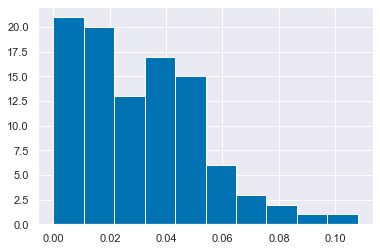

In [32]:
gender_gap[temp].abs().hist(bins=10)

In [33]:
high_gap_high_corr = gender_gap[temp].abs()[ gender_gap[temp].abs()>.05 ].index

In [34]:
low_gap_high_corr = gender_gap[temp].abs()[ gender_gap[temp].abs()<.05 ].index

In [35]:
search(BES_reduced_with_na,"al_scale|gender")

al_scale__Authoritarian    26914
gender_Female              31468
dtype: int64

In [36]:
gender_gap.sort_values().head(50)

# selfPriorities_brexit_Yes  -0.120022
# p_scot_const_vote_2011_Scottish National Party (SNP) -0.117097 (p_scot_const_vote_2011_Liberal Democrat++)
# private sector, supervisor, full time ---


# empathy10, empathy9, empathy8, empathy7, empathy4 -
# empathy5, empathy6 +

### notably, the empathy variables that don't have a gap (1,2,3) all begin "I can ..."


# lower pol attention, less likely to read newspaper

selfOccSuperviseLast_Yes                                                                                                                 -0.181702
p_job_sector_Private sector profit-seeking (e.g. public limited company, partnership)                                                    -0.179007
sectorPartner_Other public sector employer *Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch   -0.149172
sector_Private sector firm of company Including, for example, limited companies and PLCs                                                 -0.147856
p_work_stat_Working full time (30 or more hours per week)                                                                                -0.128895
workingStatus_Working full time (30 or more hours per week)                                                                              -0.123512
selfPriorities_brexit_Yes                                                                                             

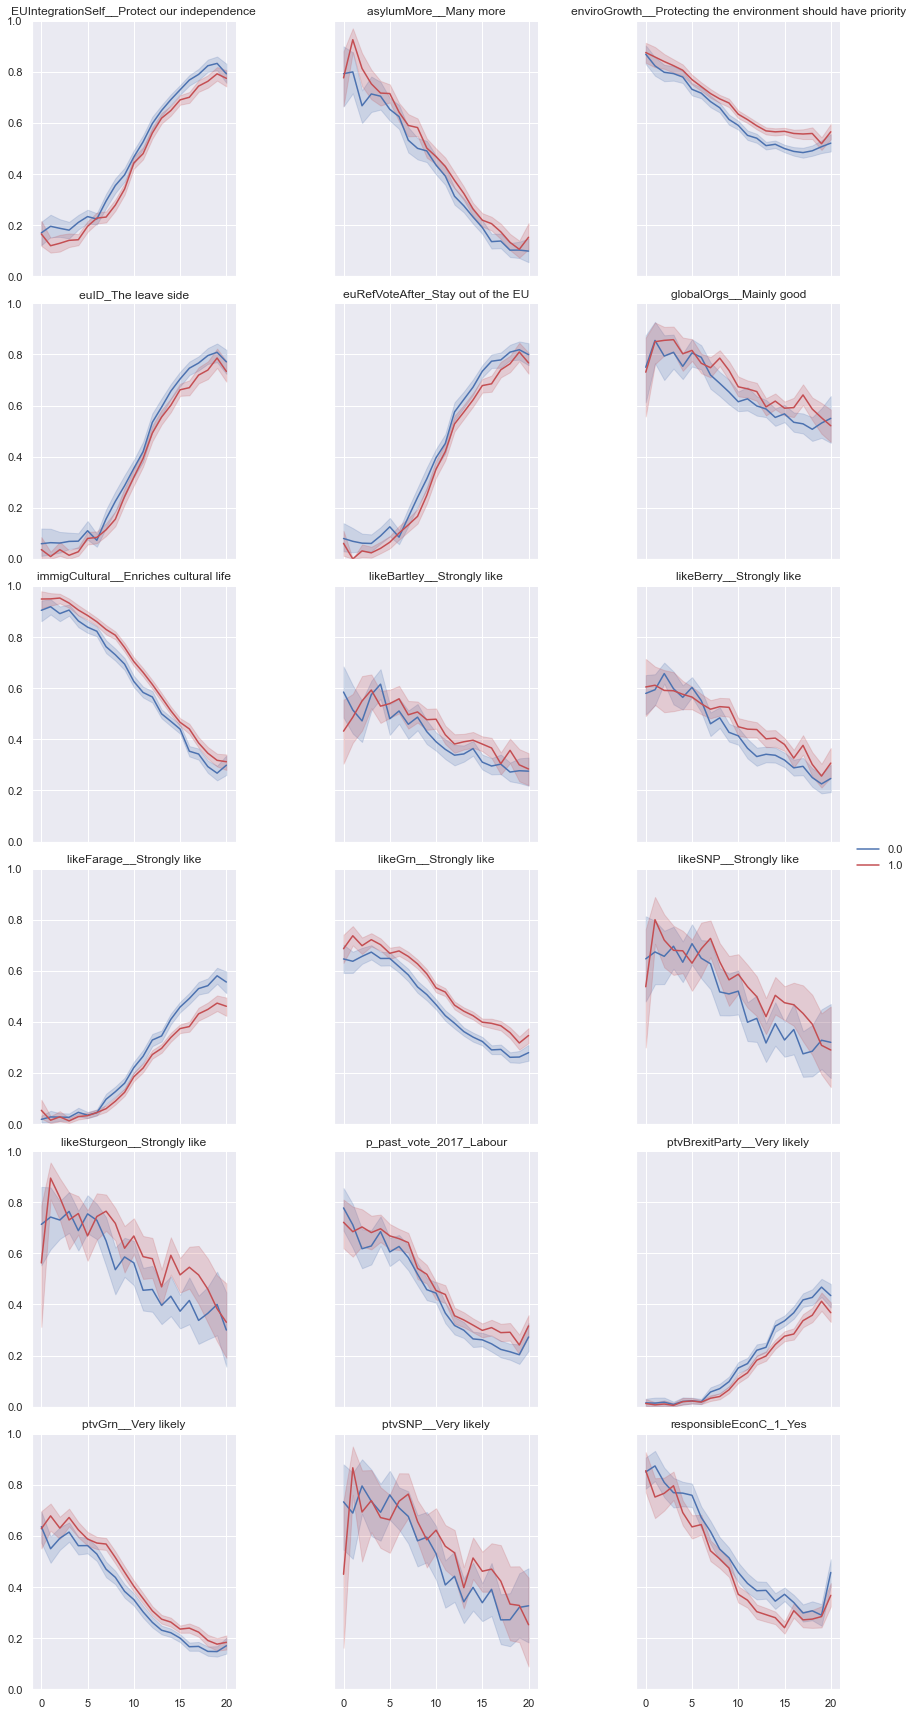

In [368]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
data = BES_reduced_with_na[["al_scale__Authoritarian","gender_Female"]+list(high_gap_high_corr)].astype('float')
data = data.melt(id_vars=["al_scale__Authoritarian","gender_Female"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=4,col_wrap=3)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="gender_Female",palette={0:'b',1:'r'});
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
# g.axes[0,0].set_xlabel('Authoritarianism');
# g.axes[0,1].set_xlabel('Authoritarianism');
# g.axes[0,2].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

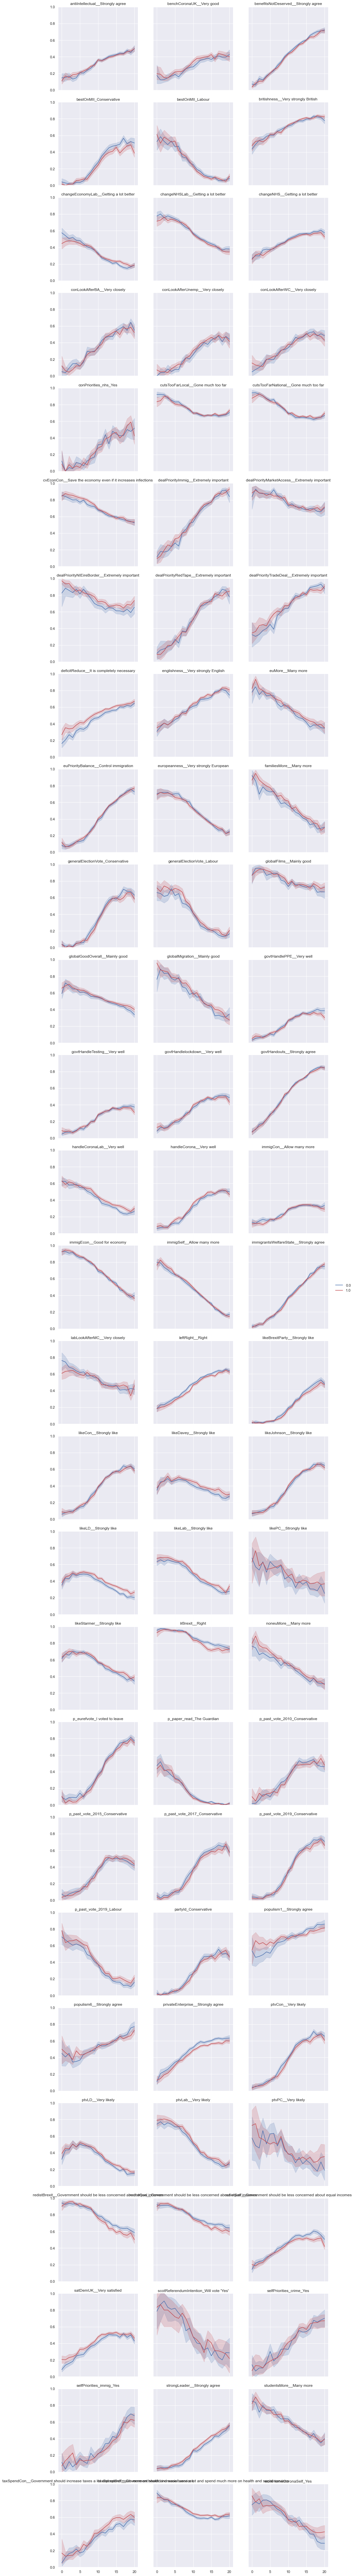

In [369]:
# data =pd.concat([authoritarianism,femaleEquality,gayEquality,blackEquality,het_or_not,df["gender"]],axis=1)
data = BES_reduced_with_na[["al_scale__Authoritarian","gender_Female"]+list(low_gap_high_corr)].astype('float')
data = data.melt(id_vars=["al_scale__Authoritarian","gender_Female"])

var_maxes = data.groupby("variable")["value"].max()

data["value"] = data["value"]/var_maxes[data["variable"]].values

g = sns.FacetGrid(data=data, col="variable",height=4,col_wrap=3)
g.map_dataframe(sns.lineplot,x="al_scale__Authoritarian",y="value",hue="gender_Female",palette={0:'b',1:'r'});
g.set_titles(col_template="{col_name}")
plt.ylim([0,1]);
g.add_legend();
# g.axes[0,0].set_xlabel('Authoritarianism');
# g.axes[0,1].set_xlabel('Authoritarianism');
# g.axes[0,2].set_xlabel('Authoritarianism');
# g.set(yticks=[0,1,2,3,4])
# g.set_yticklabels(['Not gone nearly far enough','Not gone far enough',
#                        'About right','Gone too far',
#                        'Gone much too far']);

In [ ]:
# subset of examples which *really* seem like they should be more about economic left/right

# redistSelf, privateEnterprise, govtHandouts, cutsTooFarLocal/National, deficitReduce, benefitsNotDeserved

In [37]:
search(BES_reduced_with_na,"redistSelf|privateEnterprise|deficitReduce|cutsTooFarLocal|cutsTooFarNational|govtHandouts|benefitsNotDeserved")

cutsTooFarNational__Gone much too far                                  26678
cutsTooFarLocal__Gone much too far                                     26343
redistSelf__Government should be less concerned about equal incomes    27609
privateEnterprise__Strongly agree                                      25642
govtHandouts__Strongly agree                                           29980
benefitsNotDeserved__Strongly agree                                    29461
deficitReduce__It is completely necessary                              26262
dtype: int64

In [358]:
## are any of these surprising?

# deficit_reduce (female -> necessary)
# privateenterprise -> matches male/female divide!
# taxSpend_self, redistSelf
# populism1


# maybe acquiescence, bias towards midpoint?
# strongLeader, satDemUK

# progression of p_vote_Conservative 2010/15/17/19 is cool
# ditto leftRight_self

0.0

In [ ]:
# get rid of variable=

In [ ]:
# age, resourceAccess1_2_Yes, resourceAccess3_5_Yes, edlevelPartner__Postgrad, 

# avoid things which might historical demographic 'overhangs'

# however, the education variables are prob more recent - 
# bears separate investigation!

# anyUni__Yes, I graduated from higher education
#  'p_edlevelUni__Postgrad',
#  'p_edlevel__Postgrad',
#  'p_education_age__Still at school/Full time student',

In [323]:
gender_gap.sort_values()

selfOccSuperviseLast_Yes                                                                                                                 -0.181702
p_job_sector_Private sector profit-seeking (e.g. public limited company, partnership)                                                    -0.179007
sectorPartner_Other public sector employer *Incl eg: - Central govt/ Civil Service/ Govt Agency - Local authority/ Local Educ Auth/sch   -0.149172
sector_Private sector firm of company Including, for example, limited companies and PLCs                                                 -0.147856
p_work_stat_Working full time (30 or more hours per week)                                                                                -0.128895
                                                                                                                                            ...   
ns_sec_L7.1 Intermediate clerical and administrative occupations                                                      

In [307]:
# gender_gap_corr = 
# BES_reduced_with_na.astype('float').T.corrwith(gender_gap)
#.corr(gender_gap)

# correlate gender gap with individuals???

In [308]:
gender_gap

turnoutUKGeneral__Very likely that I will vote   -0.023054
partyIdStrength__Not very strong                  0.035608
polAttention__Pay a great deal of attention      -0.084313
pidWeThey__Strongly agree                        -0.052842
pidInterestedOthers__Strongly agree              -0.002155
                                                    ...   
responsibleEconC_2_Yes                           -0.004656
responsibleEconC_1_Yes                           -0.065377
coronaMeasures_2_Yes                              0.044327
coronaMeasures_1_Yes                             -0.002246
coronaMeasures_4_Yes                              0.018628
Length: 742, dtype: float64

In [241]:
corrs

turnoutUKGeneral__Very likely that I will vote   -0.109445
partyIdStrength__Not very strong                  0.006971
polAttention__Pay a great deal of attention      -0.220401
pidWeThey__Strongly agree                         0.026360
pidInterestedOthers__Strongly agree              -0.164948
                                                    ...   
responsibleEconC_2_Yes                            0.046046
responsibleEconC_1_Yes                           -0.270511
coronaMeasures_2_Yes                             -0.043433
coronaMeasures_1_Yes                             -0.032824
coronaMeasures_4_Yes                              0.040251
Length: 742, dtype: float64

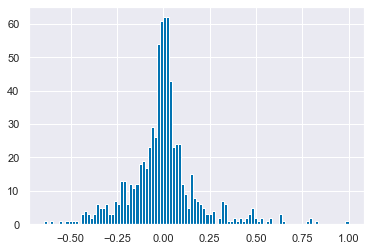

In [249]:
corrs.hist(bins=100)

In [258]:
corrs[corrs.abs()>.5].sort_values().tail(10)

dealPriorityRedTape__Extremely important    0.582385
al4__Strongly agree                         0.628310
immigrantsWelfareState__Strongly agree      0.634510
govtHandouts__Strongly agree                0.635757
dealPriorityImmig__Extremely important      0.640230
al3__Strongly agree                         0.783903
al2__Strongly agree                         0.790263
al5__Strongly agree                         0.800879
al1__Strongly agree                         0.819360
al_scale__Authoritarian                     1.000000
dtype: float64

['likeJohnson__Strongly like',
 'likeStarmer__Strongly like',
 'likeDavey__Strongly like',
 'likeSturgeon__Strongly like',
 'likeFarage__Strongly like',
 'likeBartley__Strongly like',
 'likeBerry__Strongly like',
 'likeCon__Strongly like',
 'likeLab__Strongly like',
 'likeLD__Strongly like',
 'likeSNP__Strongly like',
 'likePC__Strongly like',
 'likeBrexitParty__Strongly like',
 'likeGrn__Strongly like',
 'EUIntegrationSelf__Protect our independence',
 'immigEcon__Good for economy',
 'immigCultural__Enriches cultural life',
 'euPriorityBalance__Control immigration',
 'handleCorona__Very well',
 'handleCoronaLab__Very well',
 'govtHandlelockdown__Very well',
 'govtHandlePPE__Very well',
 'govtHandleTesting__Very well',
 'changeNHS__Getting a lot better',
 'changeEconomyLab__Getting a lot better',
 'changeNHSLab__Getting a lot better',
 'ptvCon__Very likely',
 'ptvLab__Very likely',
 'ptvLD__Very likely',
 'ptvSNP__Very likely',
 'ptvPC__Very likely',
 'ptvBrexitParty__Very likely',
 'pt

In [260]:
high_correlation_corrs

['likeJohnson__Strongly like',
 'likeStarmer__Strongly like',
 'likeDavey__Strongly like',
 'likeSturgeon__Strongly like',
 'likeFarage__Strongly like',
 'likeBartley__Strongly like',
 'likeBerry__Strongly like',
 'likeCon__Strongly like',
 'likeLab__Strongly like',
 'likeLD__Strongly like',
 'likeSNP__Strongly like',
 'likePC__Strongly like',
 'likeBrexitParty__Strongly like',
 'likeGrn__Strongly like',
 'EUIntegrationSelf__Protect our independence',
 'immigEcon__Good for economy',
 'immigCultural__Enriches cultural life',
 'euPriorityBalance__Control immigration',
 'handleCorona__Very well',
 'handleCoronaLab__Very well',
 'govtHandlelockdown__Very well',
 'govtHandlePPE__Very well',
 'govtHandleTesting__Very well',
 'changeNHS__Getting a lot better',
 'changeEconomyLab__Getting a lot better',
 'changeNHSLab__Getting a lot better',
 'ptvCon__Very likely',
 'ptvLab__Very likely',
 'ptvLD__Very likely',
 'ptvSNP__Very likely',
 'ptvPC__Very likely',
 'ptvBrexitParty__Very likely',
 'pt

In [282]:
gender_gap.sort_values()

benchCoronaKorea__Very good                   -5.706173
age                                           -2.889029
benchCoronaGermany__Very good                 -1.276736
benchCoronaUSA__Very good                     -1.055726
polAttention__Pay a great deal of attention   -0.843130
                                                 ...   
gender_Female                                  1.000000
likeSturgeon__Strongly like                    1.080234
benchCoronaUK__Very good                       2.648001
benchCoronaSweden__Very good                   3.864810
benchCoronaItaly__Very good                    4.376520
Length: 742, dtype: float64

In [293]:
gender_gap.drop('gender_Female')

turnoutUKGeneral__Very likely that I will vote   -0.023054
partyIdStrength__Not very strong                  0.035608
polAttention__Pay a great deal of attention      -0.084313
pidWeThey__Strongly agree                        -0.052842
pidInterestedOthers__Strongly agree              -0.002155
                                                    ...   
responsibleEconC_2_Yes                           -0.004656
responsibleEconC_1_Yes                           -0.065377
coronaMeasures_2_Yes                              0.044327
coronaMeasures_1_Yes                             -0.002246
coronaMeasures_4_Yes                              0.018628
Length: 741, dtype: float64

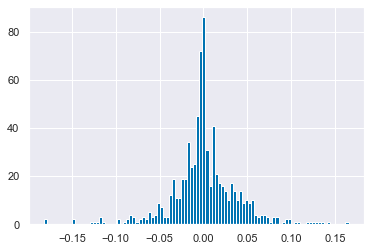

In [294]:
gender_gap.drop('gender_Female').hist(bins=100)

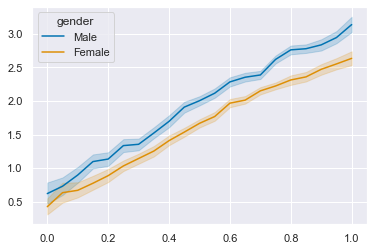

In [47]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["gender"])

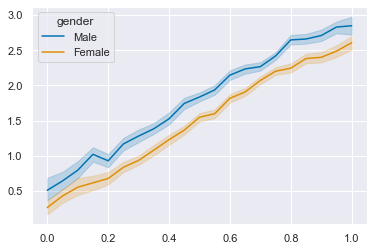

In [56]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["gender"])

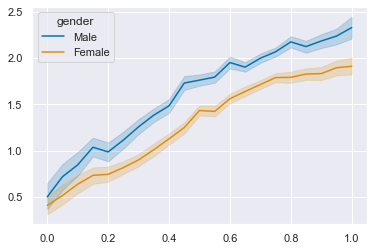

In [57]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["gender"])

In [54]:

search(df,"Equality")

scotIndepInequalityW1         5896
inequalityChangeW2           30260
inequalityChangeLargerW2     23229
inequalityChangeSmallerW2     1444
inequalityGoodBadW2          30262
                             ...  
femaleEqualityW1_W5          41876
gayEqualityW1_W5             41876
blackEqualityW6_W14          63222
femaleEqualityW6_W14         63748
gayEqualityW6_W14            63222
Length: 62, dtype: int64

In [ ]:
### how about other minorities?

In [49]:
search(df,"embes|p_")

partyContactUKIP_1W1      235
partyContactUKIP_2W1      235
partyContactUKIP_3W1      235
partyContactUKIP_4W1      235
partyContactUKIP_5W1      235
                        ...  
p_edlevelUniW21         28158
p_edlevelUniW8          29010
p_edlevelUniW17         31102
p_edlevelUniW18         23054
p_eurefturnout          91315
Length: 700, dtype: int64

In [51]:
df["p_sexualityW23"].value_counts()

Heterosexual         27207
Prefer not to say     1137
Gay or lesbian        1094
Bisexual              1084
Other                  371
Name: p_sexualityW23, dtype: int64

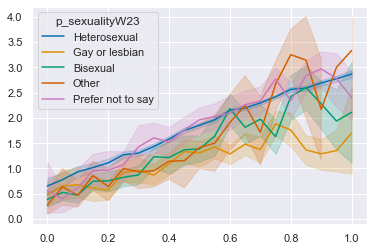

In [52]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_sexualityW23"])

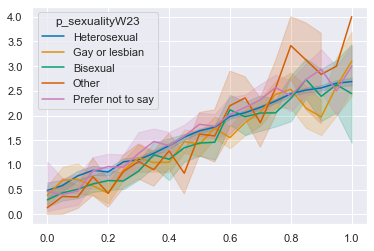

In [58]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_sexualityW23"])

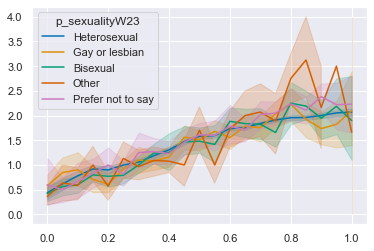

In [59]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_sexualityW23"])

In [73]:
het_or_not = df["p_sexualityW23"]=="Heterosexual"
het_or_not[df["p_sexualityW23"].isnull()]=np.nan
het_or_not.value_counts(dropna=False)

NaN    76903
1.0    27207
0.0     3686
Name: p_sexualityW23, dtype: int64

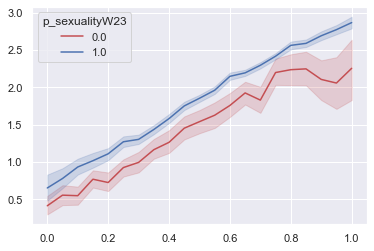

In [76]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=het_or_not,palette={0:'r',1:'b'})

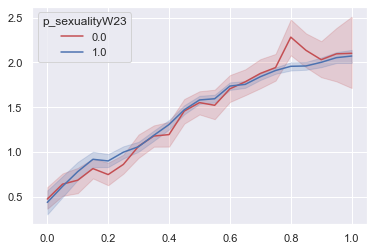

In [77]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=het_or_not,palette={0:'r',1:'b'})

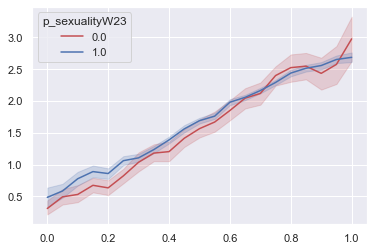

In [78]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=het_or_not,palette={0:'r',1:'b'})

In [81]:
df["p_religionW23"].value_counts()

def get_rel_minority(x):
    if x =="No, I do not regard myself as belonging to any particular religion.":
        return "Nonreligious"
    elif x =="Yes - Church of England/Anglican/Episcopal":
        return "CofE"
    elif x =="Yes - Roman Catholic":
        return "Catholic"
    elif x =="Prefer not to say":
        return "Prefer not to say"    
    elif pd.isnull(x):
        return np.nan
    else:
        return "Rel Minority"
    
df["p_religionW23"].apply(get_rel_minority).value_counts()

Nonreligious         15851
CofE                  7769
Rel Minority          4127
Catholic              2139
Prefer not to say      807
Name: p_religionW23, dtype: int64

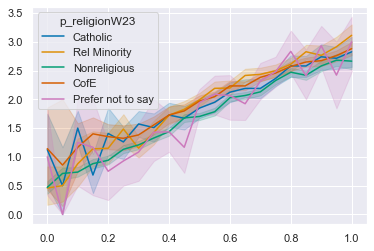

In [82]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_religionW23"].apply(get_rel_minority))

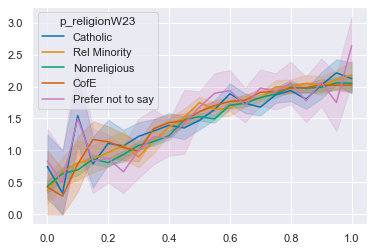

In [83]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_religionW23"].apply(get_rel_minority))

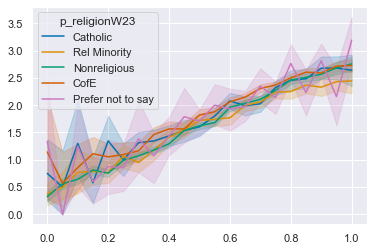

In [84]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_religionW23"].apply(get_rel_minority))

In [87]:
df["p_ethnicityW23"].value_counts()

whiteBrit_or_not = df["p_ethnicityW23"]=="White British"
whiteBrit_or_not[df["p_ethnicityW23"].isnull()]=np.nan
whiteBrit_or_not.value_counts(dropna=False)

NaN    78397
1.0    26243
0.0     3156
Name: p_ethnicityW23, dtype: int64

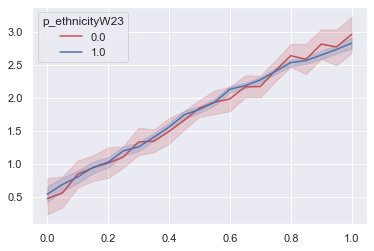

In [91]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=whiteBrit_or_not,palette={0:'r',1:'b'})

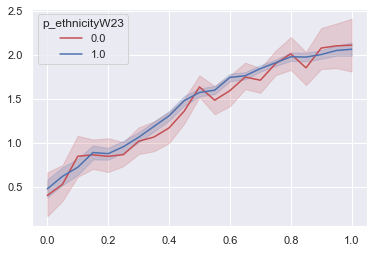

In [92]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=whiteBrit_or_not,palette={0:'r',1:'b'})

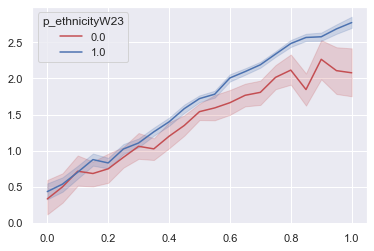

In [93]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=whiteBrit_or_not,palette={0:'r',1:'b'})

In [94]:
## p_parent, p_disability

In [96]:
df["p_parentW23"].value_counts()

Yes    17808
No     11743
Name: p_parentW23, dtype: int64

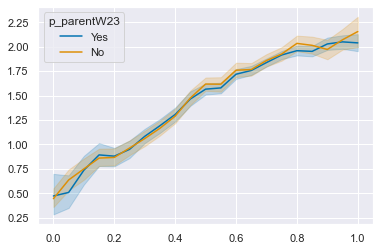

In [97]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_parentW23"])

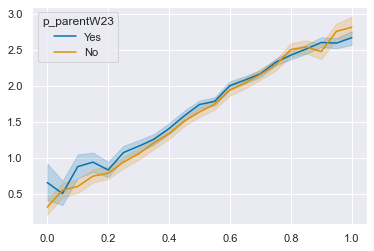

In [98]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_parentW23"])

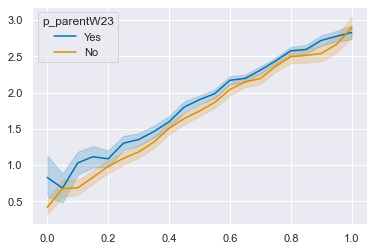

In [99]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_parentW23"])

In [106]:
femaleEquality.notnull().sum(),gayEquality.notnull().sum(),blackEquality.notnull().sum()

(28589, 27432, 27659)

In [108]:
df["p_disabilityW23"].value_counts()

No                       21440
Yes, limited a little     5917
Yes, limited a lot        3208
Name: p_disabilityW23, dtype: int64

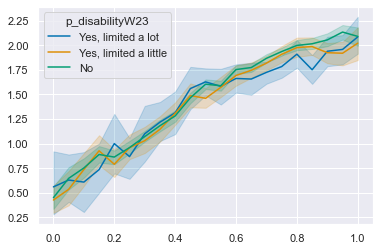

In [109]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=df["p_disabilityW23"])

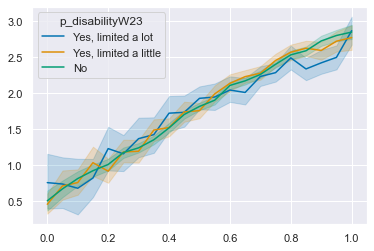

In [110]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=df["p_disabilityW23"])

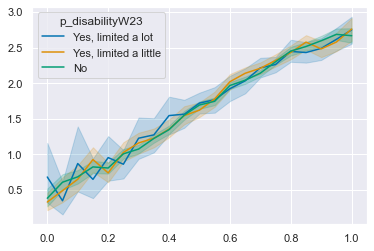

In [111]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=df["p_disabilityW23"])

In [113]:
not_disabled_at_all = df["p_disabilityW23"]=="No"
not_disabled_at_all[  df["p_disabilityW23"].isnull() ]=np.nan
not_disabled_at_all.value_counts(dropna=False)

NaN    77231
1.0    21440
0.0     9125
Name: p_disabilityW23, dtype: int64

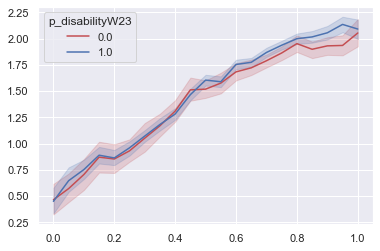

In [114]:
sns.lineplot(x=authoritarianism, y=femaleEquality, hue=not_disabled_at_all,palette={0:'r',1:'b'})

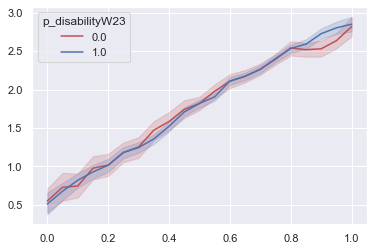

In [115]:
sns.lineplot(x=authoritarianism, y=gayEquality, hue=not_disabled_at_all,palette={0:'r',1:'b'})

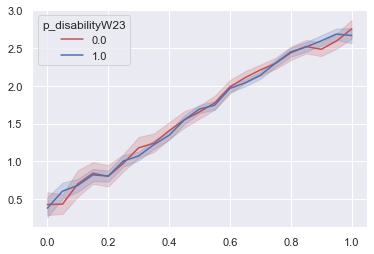

In [116]:
sns.lineplot(x=authoritarianism, y=blackEquality, hue=not_disabled_at_all,palette={0:'r',1:'b'})

In [372]:
search(BES_reduced_with_na,"Farage|al2")

likeFarage__Strongly like    29778
al2__Strongly agree          29498
dtype: int64

In [374]:
BES_reduced_with_na["likeFarage__Strongly like"].groupby(BES_reduced_with_na["al2__Strongly agree"]).mean()

al2__Strongly agree
0.0    0.961051
1.0    1.979009
2.0    3.049005
3.0    3.688448
4.0    4.719222
Name: likeFarage__Strongly like, dtype: float32

In [376]:
BES_reduced_with_na["al2__Strongly agree"].value_counts(normalize=True).sort_index()

0.0    0.271171
1.0    0.148552
2.0    0.119364
3.0    0.230049
4.0    0.230863
Name: al2__Strongly agree, dtype: float64